In [ ]:
!nvidia-smi

Wed Aug 19 08:14:29 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 450.57       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   37C    P0    26W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [1]:
!pip install simpletransformers
!pip install transformers


     |████████████████████████████████| 215kB 2.8MB/s 
     |████████████████████████████████| 778kB 8.9MB/s 
     |████████████████████████████████| 3.0MB 13.8MB/s 
     |████████████████████████████████| 71kB 2.1MB/s 
     |████████████████████████████████| 1.4MB 7.2MB/s 
     |████████████████████████████████| 317kB 19.0MB/s 
     |████████████████████████████████| 7.2MB 24.1MB/s 
     |████████████████████████████████| 890kB 53.0MB/s 
     |████████████████████████████████| 1.1MB 45.1MB/s 
     |████████████████████████████████| 102kB 12.8MB/s 
     |████████████████████████████████| 163kB 46.9MB/s 
     |████████████████████████████████| 102kB 12.1MB/s 
     |████████████████████████████████| 122kB 31.9MB/s 
     |████████████████████████████████| 112kB 57.6MB/s 
     |████████████████████████████████| 4.4MB 45.5MB/s 
     |████████████████████████████████| 71kB 10.8MB/s 
     |████████████████████████████████| 71kB 11.0MB/s 
     |████████████████████████████████| 122kB 52.6MB/s 

     |████████████████████████████████| 3.0MB 2.6MB/s 
  Found existing installation: tokenizers 0.8.1
    Uninstalling tokenizers-0.8.1:
      Successfully uninstalled tokenizers-0.8.1


In [2]:
import os, gc, sys
import random

import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import f1_score

from simpletransformers.classification import ClassificationModel
import torch
from torch.utils.data import Dataset, DataLoader
from transformers import BertTokenizer, BertModel
from torch import optim
from torch import cuda
import time
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import copy
import io
from google.colab import drive
import threading
import lightgbm as lgb
import multiprocessing
import time
import tensorflow as tf
drive.mount('/content/drive')
import tensorflow as tf
import os.path
import gc
import pickle
import lightgbm as lgb
import sys
import yellowbrick
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
#import pandas_profiling as pdp
import seaborn as sns
import os

from sklearn.model_selection import KFold
tf.test.gpu_device_name()

import wandb
api_key = "49247722410c9febfbac2bd001c00497ea02f227"
wandb.login(key=api_key)
wandb.init(project="signate_student")
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
torch.tensor([1,2,3]).to("cuda:0")

wandb: WARNING W&B installed but not logged in.  Run `wandb login` or set the WANDB_API_KEY env variable.


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publically.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: WARNING Calling wandb.login() without arguments from jupyter should prompt you for an api key.
wandb: Appending key for api.wandb.ai to your

tensor([1, 2, 3], device='cuda:0')

方針:以下の指標を用意
(1)データ収集・運用(サーバー・ウェブへの知識) 80点
(2)データサイエンティスト能力 130点
(3)解析結果利用能力(ビジネスへの応用) 50点
(4)ボーナス(実績、特殊技能) (1)(2)(3)の合計点を1.0~1.5倍
合計: MAX390点

スコア詳細:
(1)データ収集・運用
　プログラミング能力(MAX 30点):
　  言語(MAX25点): 一つ5点
  　ライブラリ・サービス(言語のスコアを1.0から1.3倍): 一つ+0.05
  経験(MAX 50点):
    ・一件当たり(15×年数)点
  　3年以内: 1倍
  　3=8年: 0.8倍
    8年以上前: 0.6倍
(2)データサイエンティスト能力
    python ないと0点
　プログラミング能力(MAX 50点):
    pandas,lightGBMなどの基本ライブラリMAX30点 一つ5点
    R15点
  　その他ライブラリ・サービス(言語のスコアを1.0~1.5倍): 一つ+0.1
  経験(MAX 90点): ※この分野は技術進歩が激しいため減衰が早い
  　・一件当たり(15×年数)点
  　2年以内: 1倍
  　2-5年: 0.8倍
    5年以上前: 0.6倍
(3)解析結果利用能力
　経験(MAX50点):
    ・一件当たり(15×年数)点
    5年以内: 1倍
  　5年以上前: 0.8倍
(4)ボーナス
  実績(MAX+0.3):
  　・1件あたり+0.1
  特殊技能(MAX+0.2):
  　・1件あたり+0.05
　　



In [9]:
BASE_PATH = '/content/drive/My Drive/google_notebook/signate_insite/'

edu_df = pd.read_csv(BASE_PATH+"EducationalBackground.csv")
ski_df = pd.read_csv(BASE_PATH+"Skills.csv")
wor_df = pd.read_csv(BASE_PATH+"WorkExperience.csv")

ids = 6 #6人分確保
now_year = 2021 #就業時の年

In [251]:
years_list = [[3, 8],[2, 5], [5, 999]]
def exp_score(start_y, end_y, cat, dev):
  global now_year, years_list
  first_p = now_year - years_list[cat][0]
  second_p = first_p = now_year - years_list[cat][1]

  first_years = 0
  second_years = 0
  third_years = 0

  if end_y > first_p:
    first_years = end_y - max(start_y, first_p)
  if start_y < first_p:
    second_years = min(end_y, first_p) - max(start_y, second_p)
  if start_y < second_p:
    third_years = min(end_y, second_p) - start_y

  score = first_years + second_years * 0.8 + third_years * 0.6

  return score / dev

In [252]:
class scores:
  gra_year = -1 #卒業した年
  years = 0.0 #卒業後の年数
  cat1_lang = 0.0 #プログラム言語の知識
  cat1_lib = 1.0 #ライブラリ・サービスの知識
  cat1_lanlib = 0.0 #上記二つのスコア集計
  cat1_exp = 0.0 #プログラミング実績
  cat1_score = 0.0
  python_can = 0 #pythonが使えるか
  R_can = 0 #pythonが使えるか
  cat2_lang = 0.0 #データサイエンティストに必要な基礎ライブラリ知識 
  cat2_lib = 1.0 #その他ライブラリ・サービスの知識
  cat2_lanlib = 0.0 #上記二つのスコア集計
  cat2_exp = 0.0 #データ解析実績
  cat2_score = 0.0
  cat3_exp = 0.0 #データ活用実績
  cat3_score = 0.0
  op_grad = 0.0 #実績
  op_sp = 0.0 #特殊技能
  op_sum = 1.0
  all_score = 0.0
  c1_lang_list = []
  c1_lib_list = []
  c2_lang_list = []
  c2_lib_list = []
  op_grad_list = []
  op_sp_list = []

  def year_rank(self):
    if self.years < 2: return "rookie"
    elif self.years < 5: return "young age"
    elif self.years < 10: return "middle age"
    else: return "elder"

  def list_to_score(self):
    self.c1_lang_list = list(set(self.c1_lang_list))
    self.c1_lib_list = list(set(self.c1_lib_list))
    self.c2_lang_list = list(set(self.c2_lang_list))
    self.c2_lib_list = list(set(self.c2_lib_list))
    self.op_grad_list = list(set(self.op_grad_list))
    self.op_sp_list = list(set(self.op_sp_list))

    self.cat1_lang = len(self.c1_lang_list) * 5
    self.cat1_lib = 1.0 + len(self.c1_lib_list) * 0.05
    self.cat2_lang = len(self.c2_lang_list) * 5
    self.cat2_lib = 1.0 + len(self.c2_lib_list) * 0.1
    self.op_grad = len(self.op_grad_list) * 0.1
    self.op_sp = len(self.op_sp_list) * 0.05
  
  def cal_score(self):
    global now_year
    self.list_to_score()

    self.years = now_year - self.gra_year

    c1_lang = self.cat1_lang
    if c1_lang > 25: c1_lang = 25
    c1_lib = self.cat1_lib
    if c1_lib > 1.3: c1_lib = 1.3
    self.cat1_lanlib = c1_lang * c1_lib
    if self.cat1_lanlib > 30: self.cat1_lanlib = 30
    self.cat1_lanlib = round(self.cat1_lanlib , 1)
    self.cat1_exp = round(self.cat1_exp , 1)
    c1_exp = self.cat1_exp
    if c1_exp >50 : c1_exp = 50
    self.cat1_score = self.cat1_lanlib + c1_exp
    self.cat1_score = round(self.cat1_score , 1)

    c2_lang = self.cat2_lang * self.python_can
    if c2_lang > 30: c2_lang = 30
    c2_lib = self.cat2_lib
    if c2_lib > 1.5: c2_lib = 1.5
    self.cat2_lanlib = (c2_lang + 15 * self.R_can) * c2_lib * self.python_can
    if self.cat2_lanlib > 50: self.cat2_lanlib = 50
    self.cat2_lanlib = round(self.cat2_lanlib , 1)
    self.cat2_exp = round(self.cat2_exp , 1)
    c2_exp = self.cat2_exp
    if c2_exp >90 : c2_exp = 90
    self.cat2_score = self.cat2_lanlib + c2_exp
    self.cat2_score = round(self.cat2_score , 1)

    self.cat3_exp = round(self.cat3_exp , 1)
    c3_exp = self.cat3_exp
    if c3_exp > 50: c3_exp = 50
    self.cat3_score = c3_exp
    self.cat3_score = round(self.cat3_score , 1)

    op_g = self.op_grad
    if op_g > 0.3: op_g = 0.3
    op_s = self.op_sp
    if op_s > 0.2: op_g = 0.2
    self.op_sum = 1.0 + op_g + op_s

    self.all_score = (self.cat1_score + self.cat2_score + self.cat3_score) * self.op_sum
    self.all_score = round(self.all_score , 1)

scores_list = [scores() for ii in range(ids)]

In [253]:
edu_df

,id,From,To,Degree,Major
0,1,2005,2009,Bachelor,Mathematics
1,1,2009,2011,Master,"Economics, Econometrics, and Management"
2,2,1993,1998,Bachelor,Computer Science
3,2,1998,2003,PhD,Computer Science
4,3,2009,2013,Bachelor,Computer Engineering
5,3,2013,2015,Master,Computer Engineering
6,4,2010,2014,Bachelor,Mechanical Engineering
7,4,2015,2016,Master,Computer Science
8,5,2003,2007,Bachelor,Mathematical Engineering
9,5,2007,2008,Master,Mathematical Engineering


In [254]:
ski_df

,id,skills
0,1,"Python, SQL, R, C#, Java, JavaScript, Spark, S..."
1,2,"SQL, Hive, Bigquery, AWS, Python, R, Tableau, ..."
2,3,"Python, C#, Wolfram, Markdown, Java, C++, SQL,..."
3,4,"Python, C/C++, R , SQL, Java, PHP/Hack, Scala,..."
4,5,"Python, SQL, Visual Basic for Applications (VB..."
5,6,"Hive, Presto, Tableau, Advanced Excel, Git, Ai..."


In [255]:
wor_df

,id,From,To,industry,jobtitle,achievements
0,1,2011,2015,Consulting,Senior Consultant,- Engaged multiple CRM/Analytic projects acros...
1,1,2016,2016,Consulting,Natural Language Processing Consultant,- Scraped PDFs with Python in order to help di...
2,1,2017,2019,Tech,Data Scientist (Contract),- Led the development and implementation of th...
3,1,2019,2020,Tech,Data Scientist (NLP Research),- Developed language models across 100GB email...
4,2,2004,2018,Tech,Research Scientist,- As both an individual engineering contributo...
5,2,2019,2020,Tech,Data Scientist,- Our team was in charge of refurbishing recom...
6,3,2015,2015,Tech,Machine Learning Engineer,- Developed a Linux and Windows application fo...
7,3,2016,2016,Tech,Machine Learning Engineer,- Designed the curriculum of various Data Scie...
8,3,2017,2017,Tech,Data Scientist,- Created a real time system to capture the be...
9,3,2018,2018,Tech,Machine Learning Engineer,- Created computer vision models for autonomou...


In [256]:
grad_year

[2011, 2003, 2015, 2016, 2008, 2012]

In [257]:
from nltk.stem.porter import PorterStemmer
import re, copy

grad_year = [-1 for jj in range(ids)]

for ii in range(len(edu_df)):
  id_num = edu_df.iloc[ii,0] - 1
  year = edu_df.iloc[ii,2]
  if grad_year[id_num] < year: grad_year[id_num] = year

for ii in range(ids):
  scores_list[ii].gra_year = grad_year[ii]

In [258]:


#プログラミング言語の分類
r_lang_list = ['javascript','hack','haskell','java','c++','visual basic','php' ,'c#','c' ,'php','javascript' ,'java', 'html'] #R,pythonを除くメジャーなプログラミング言語
               
r_libser_list = ['git','sklearn','scipy','bigquery','opencv','tableau'] #データサイエンティストが使うかもしれないライブラリ・サービス 
r_libser_list_super = ['scikit-learn','jupyter','xgboost','pandas','matlab','matplotlib','tensorflow','numpy','pytorch','cuda'] #データサイエンティストがよく使うライブラリ・サービス 
prkari = []
for ii in range(len(ski_df)):
  id_num = ski_df.iloc[ii,0] - 1

  clean_punc = ski_df.iloc[ii,1].replace('/', ', ').lower()

  prkk = [lang for lang in clean_punc.split(', ')]

  for lali in prkk:
    if lali == 'python': scores_list[id_num].python_can = 1
    elif lali == "r": scores_list[id_num].R_can = 1
    elif lali in r_lang_list: scores_list[id_num].c1_lang_list.append(lali)
    elif lali in r_libser_list_super: scores_list[id_num].c2_lang_list.append(lali)
    elif lali in r_libser_list: scores_list[id_num].c2_lib_list.append(lali)
    else: scores_list[id_num].c1_lib_list.append(lali)

In [259]:
kk

['engag multipl crm/analyt project across asia pacif with lead multin custom and partners.',
 'led three project to assist the market oper group develop analyt capabilities.',
 'scope more than 100 kpi and develop dashboard for the sale and market leader of 19 brands.',
 "analyz a client' success for an end-to-end plan change.",
 'assess sale and market group’ competit readi for product loss-of-exclus and recommend capabl to the execut committe to develop and enhance.',
 'facilit workshop with senior sale and market leadership led focu interview and develop framework to analyz qualit information.',
 'manag the program to improv classif practic and enabl data-driven decision-making.',
 'ran pmo manag six work stream and led quarterli meet with the managers.',
 'scrape pdf with python in order to help digit the offici document the citi record.',
 'help design a schema for entri (such as extract addresses).',
 'creat data clean regim to standard entri from over a hundr citi agenc that all

In [260]:
c1_word = ["design","develop", "detect", "upgrad", "creat","perform", "provid","wrote"]
c1_high_word = ["softwar","maintain", "error"]
c2_word = ["data","analyt","analysi"]
c2_high_word = ["neural network", "model", "cluster","dataset", "big data"]
c3_word = ["custom", "support", "user", "market","suggest"]
c3_high_word = ["busi", "research","team","lead", "report"]
from nltk.stem.porter import PorterStemmer
stemmer = PorterStemmer()
for ii in range(len(wor_df)):
  id_num = wor_df.iloc[ii,0] - 1
  sli = scores_list[id_num] 
  start_year = wor_df.iloc[ii,1]
  end_year = wor_df.iloc[ii,2]
  achievements = wor_df.iloc[ii,5].replace('- ', '').replace(',', '').lower()
  achievement_list = [achievement for achievement in achievements.split('\n')]

  l_achive = len(achievement_list)
  for achievement in achievement_list:
      c1 = 0
      c2 = 0
      c3 = 0
      #ステミング
      clean_normalize = [stemmer.stem(word) for word in achievement.split()]
      #単語同士をスペースでつなぎ, 文章に戻す
      clean_text = ' '.join(clean_normalize)

      for word in c1_word:
         if (word in clean_text): c1 += 1
      for word in c1_high_word:
         if (word in clean_text): c1 += 2
      for word in c2_word:
         if (word in clean_text): c2 += 1
      for word in c2_high_word:
         if (word in clean_text): c2 += 2
      for word in c3_word:
         if (word in clean_text): c2 += 1
      for word in c3_high_word:
         if (word in clean_text): c2 += 2

      if (c1 > c2) and (c1 > c3): c1 += 3
      elif (c2 > c1) and (c2 > c3): c2 += 3
      elif (c3 > c1) and (c3 > c2): c3 += 3

      if (c1 + c2 + c3 == 0): c3 += 1

      score_div = (c1 + c2 + c3) * l_achive

      c1_score = exp_score(start_year, end_year, 0, score_div) * c1 * 15
      c2_score = exp_score(start_year, end_year, 1, score_div) * c2 * 15
      c3_score = exp_score(start_year, end_year, 2, score_div) * c3 * 15

      sli.cat1_exp += c1_score
      sli.cat2_exp += c2_score
      sli.cat3_exp += c3_score
      
      if ("imag" in clean_text): sli.op_sp_list.append("image")
      if ("vision" in clean_text): sli.op_sp_list.append("vision")
      elif ("visual" in clean_text): sli.op_sp_list.append("vision")
      if ("strong" in clean_text): sli.op_grad_list.append("strong")
      
    


In [261]:
scores_list[1].cat1_exp

6.156547619047617

In [262]:
for ii in range(ids):
  sli = scores_list[ii]
  sli.cal_score()
  datas = pd.DataFrame({'years':sli.year_rank(),
                        'cat1_lanlib':sli.cat1_lanlib,
                        'cat2_lanlib':sli.cat2_lanlib,
                        'cat1_exp':sli.cat1_exp,
                        'cat2_exp':sli.cat2_exp,
                        'cat3_exp':sli.cat3_exp,
                        'cat1_score':sli.cat1_score,
                        'cat2_score':sli.cat2_score,
                        'cat3_score':sli.cat3_score,
                        'op_grad':sli.op_grad,
                        'op_sp':sli.op_sp,
                        'op_sum':sli.op_sum,
                        'all_score':sli.all_score},
                       index=['i',])
  datas.to_csv(BASE_PATH + "data_" + str(ii) + ".csv", index=False)

[Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, 'cat1'),
 Text(0, 0, ''),
 Text(0, 0, 'cat2'),
 Text(0, 0, ''),
 Text(0, 0, 'cat3'),
 Text(0, 0, ''),
 Text(0, 0, 'all')]

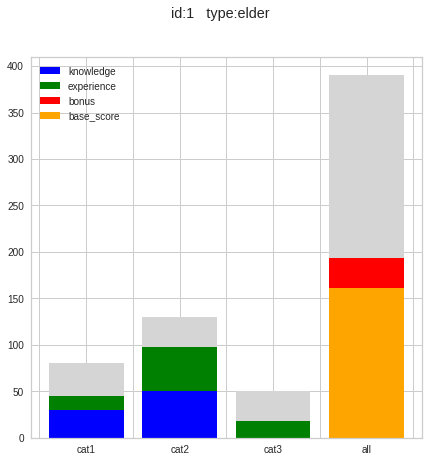

In [269]:
ii = 0
sli = scores_list[ii]
left = np.array([0, 1, 2, 3])
height1 = np.array([sli.cat1_lanlib, sli.cat2_lanlib, 0, 0])
height2 = np.array([sli.cat1_exp, sli.cat2_exp, sli.cat3_exp , 0])
height3 = np.array([0, 0, 0 , sli.all_score / sli.op_sum])
height4 = np.array([0, 0, 0 , sli.all_score])
height5 = np.array([80 - sli.cat1_exp - sli.cat1_lanlib, 130 - sli.cat2_lanlib - sli.cat2_exp, 50 - sli.cat3_exp, 390 - sli.all_score])

fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111)

p1 = ax.bar(left, height1, color="blue")
p2 = ax.bar(left, height2, bottom=height1, color="green")
p3 = ax.bar(left, height4, bottom=height1 + height2, color="red")
p4 = ax.bar(left, height3, bottom=height1 + height2, color="#ffa500")
p5 = ax.bar(left, height5, bottom=height1 + height2 + height4, color="#d5d5d5")
ax.legend((p1[0], p2[0], p3[0], p4[0], p5[0]), ("knowledge", "experience", "bonus", "base_score"))
fig.suptitle("id:"+ str(ii+1) + "   type:" + sli.year_rank())
labels = ["","","cat1","","cat2", "","cat3","", "all"]
ax.set_xticklabels(labels)

[Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, 'cat1'),
 Text(0, 0, ''),
 Text(0, 0, 'cat2'),
 Text(0, 0, ''),
 Text(0, 0, 'cat3'),
 Text(0, 0, ''),
 Text(0, 0, 'all')]

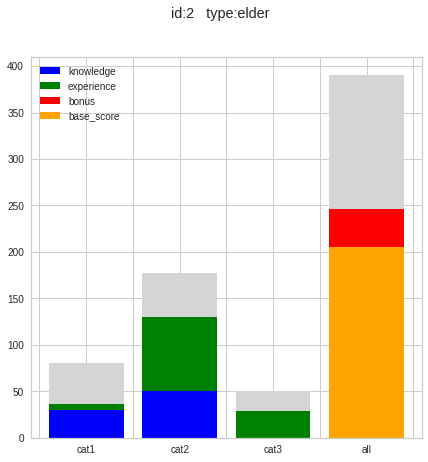

In [270]:
ii = 1
sli = scores_list[ii]
left = np.array([0, 1, 2, 3])
height1 = np.array([sli.cat1_lanlib, sli.cat2_lanlib, 0, 0])
height2 = np.array([sli.cat1_exp, sli.cat2_exp, sli.cat3_exp , 0])
height3 = np.array([0, 0, 0 , sli.all_score / sli.op_sum])
height4 = np.array([0, 0, 0 , sli.all_score])
height5 = np.array([80 - sli.cat1_exp - sli.cat1_lanlib, 130 - sli.cat2_lanlib - sli.cat2_exp, 50 - sli.cat3_exp, 390 - sli.all_score])

fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111)

p1 = ax.bar(left, height1, color="blue")
p2 = ax.bar(left, height2, bottom=height1, color="green")
p3 = ax.bar(left, height4, bottom=height1 + height2, color="red")
p4 = ax.bar(left, height3, bottom=height1 + height2, color="#ffa500")
p5 = ax.bar(left, height5, bottom=height1 + height2 + height4, color="#d5d5d5")
ax.legend((p1[0], p2[0], p3[0], p4[0], p5[0]), ("knowledge", "experience", "bonus", "base_score"))
fig.suptitle("id:"+ str(ii+1) + "   type:" + sli.year_rank())
labels = ["","","cat1","","cat2", "","cat3","", "all"]
ax.set_xticklabels(labels)

[Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, 'cat1'),
 Text(0, 0, ''),
 Text(0, 0, 'cat2'),
 Text(0, 0, ''),
 Text(0, 0, 'cat3'),
 Text(0, 0, ''),
 Text(0, 0, 'all')]

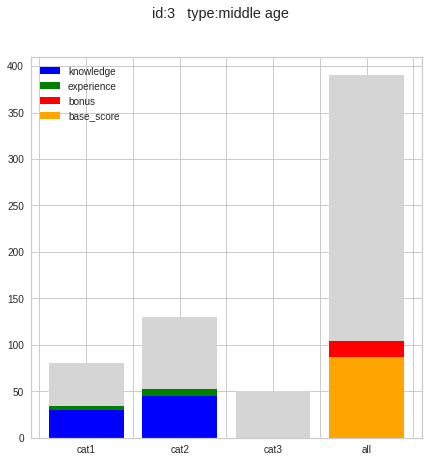

In [271]:
ii = 2
sli = scores_list[ii]
left = np.array([0, 1, 2, 3])
height1 = np.array([sli.cat1_lanlib, sli.cat2_lanlib, 0, 0])
height2 = np.array([sli.cat1_exp, sli.cat2_exp, sli.cat3_exp , 0])
height3 = np.array([0, 0, 0 , sli.all_score / sli.op_sum])
height4 = np.array([0, 0, 0 , sli.all_score])
height5 = np.array([80 - sli.cat1_exp - sli.cat1_lanlib, 130 - sli.cat2_lanlib - sli.cat2_exp, 50 - sli.cat3_exp, 390 - sli.all_score])

fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111)

p1 = ax.bar(left, height1, color="blue")
p2 = ax.bar(left, height2, bottom=height1, color="green")
p3 = ax.bar(left, height4, bottom=height1 + height2, color="red")
p4 = ax.bar(left, height3, bottom=height1 + height2, color="#ffa500")
p5 = ax.bar(left, height5, bottom=height1 + height2 + height4, color="#d5d5d5")
ax.legend((p1[0], p2[0], p3[0], p4[0], p5[0]), ("knowledge", "experience", "bonus", "base_score"))
fig.suptitle("id:"+ str(ii+1) + "   type:" + sli.year_rank())
labels = ["","","cat1","","cat2", "","cat3","", "all"]
ax.set_xticklabels(labels)

[Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, 'cat1'),
 Text(0, 0, ''),
 Text(0, 0, 'cat2'),
 Text(0, 0, ''),
 Text(0, 0, 'cat3'),
 Text(0, 0, ''),
 Text(0, 0, 'all')]

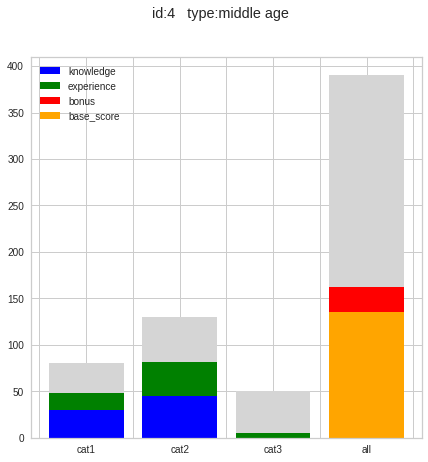

In [272]:
ii = 3
sli = scores_list[ii]
left = np.array([0, 1, 2, 3])
height1 = np.array([sli.cat1_lanlib, sli.cat2_lanlib, 0, 0])
height2 = np.array([sli.cat1_exp, sli.cat2_exp, sli.cat3_exp , 0])
height3 = np.array([0, 0, 0 , sli.all_score / sli.op_sum])
height4 = np.array([0, 0, 0 , sli.all_score])
height5 = np.array([80 - sli.cat1_exp - sli.cat1_lanlib, 130 - sli.cat2_lanlib - sli.cat2_exp, 50 - sli.cat3_exp, 390 - sli.all_score])

fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111)

p1 = ax.bar(left, height1, color="blue")
p2 = ax.bar(left, height2, bottom=height1, color="green")
p3 = ax.bar(left, height4, bottom=height1 + height2, color="red")
p4 = ax.bar(left, height3, bottom=height1 + height2, color="#ffa500")
p5 = ax.bar(left, height5, bottom=height1 + height2 + height4, color="#d5d5d5")
ax.legend((p1[0], p2[0], p3[0], p4[0], p5[0]), ("knowledge", "experience", "bonus", "base_score"))
fig.suptitle("id:"+ str(ii+1) + "   type:" + sli.year_rank())
labels = ["","","cat1","","cat2", "","cat3","", "all"]
ax.set_xticklabels(labels)

[Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, 'cat1'),
 Text(0, 0, ''),
 Text(0, 0, 'cat2'),
 Text(0, 0, ''),
 Text(0, 0, 'cat3'),
 Text(0, 0, ''),
 Text(0, 0, 'all')]

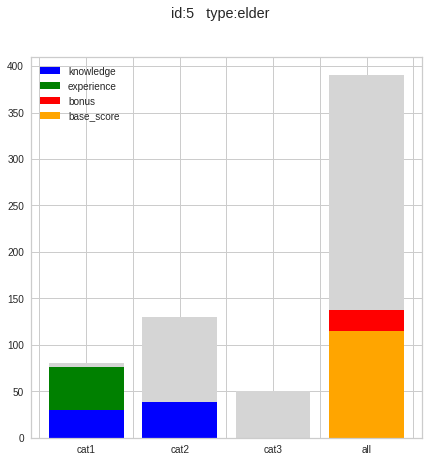

In [273]:
ii = 4
sli = scores_list[ii]
left = np.array([0, 1, 2, 3])
height1 = np.array([sli.cat1_lanlib, sli.cat2_lanlib, 0, 0])
height2 = np.array([sli.cat1_exp, sli.cat2_exp, sli.cat3_exp , 0])
height3 = np.array([0, 0, 0 , sli.all_score / sli.op_sum])
height4 = np.array([0, 0, 0 , sli.all_score])
height5 = np.array([80 - sli.cat1_exp - sli.cat1_lanlib, 130 - sli.cat2_lanlib - sli.cat2_exp, 50 - sli.cat3_exp, 390 - sli.all_score])

fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111)

p1 = ax.bar(left, height1, color="blue")
p2 = ax.bar(left, height2, bottom=height1, color="green")
p3 = ax.bar(left, height4, bottom=height1 + height2, color="red")
p4 = ax.bar(left, height3, bottom=height1 + height2, color="#ffa500")
p5 = ax.bar(left, height5, bottom=height1 + height2 + height4, color="#d5d5d5")
ax.legend((p1[0], p2[0], p3[0], p4[0], p5[0]), ("knowledge", "experience", "bonus", "base_score"))
fig.suptitle("id:"+ str(ii+1) + "   type:" + sli.year_rank())
labels = ["","","cat1","","cat2", "","cat3","", "all"]
ax.set_xticklabels(labels)

[Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, 'cat1'),
 Text(0, 0, ''),
 Text(0, 0, 'cat2'),
 Text(0, 0, ''),
 Text(0, 0, 'cat3'),
 Text(0, 0, ''),
 Text(0, 0, 'all')]

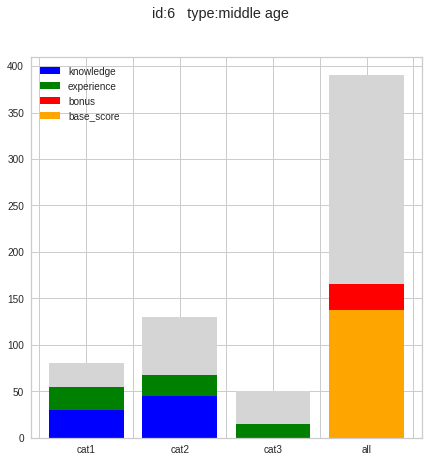

In [274]:
ii = 5
sli = scores_list[ii]
left = np.array([0, 1, 2, 3])
height1 = np.array([sli.cat1_lanlib, sli.cat2_lanlib, 0, 0])
height2 = np.array([sli.cat1_exp, sli.cat2_exp, sli.cat3_exp , 0])
height3 = np.array([0, 0, 0 , sli.all_score / sli.op_sum])
height4 = np.array([0, 0, 0 , sli.all_score])
height5 = np.array([80 - sli.cat1_exp - sli.cat1_lanlib, 130 - sli.cat2_lanlib - sli.cat2_exp, 50 - sli.cat3_exp, 390 - sli.all_score])

fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111)

p1 = ax.bar(left, height1, color="blue")
p2 = ax.bar(left, height2, bottom=height1, color="green")
p3 = ax.bar(left, height4, bottom=height1 + height2, color="red")
p4 = ax.bar(left, height3, bottom=height1 + height2, color="#ffa500")
p5 = ax.bar(left, height5, bottom=height1 + height2 + height4, color="#d5d5d5")
ax.legend((p1[0], p2[0], p3[0], p4[0], p5[0]), ("knowledge", "experience", "bonus", "base_score"))
fig.suptitle("id:"+ str(ii+1) + "   type:" + sli.year_rank())
labels = ["","","cat1","","cat2", "","cat3","", "all"]
ax.set_xticklabels(labels)